In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_bar
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv("hotel_bookings.csv")

df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [7]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [12]:
plot_canceled = df.groupby('hotel').is_canceled.count().reset_index()

plot_canceled

,hotel,is_canceled
0,City Hotel,79330
1,Resort Hotel,40060


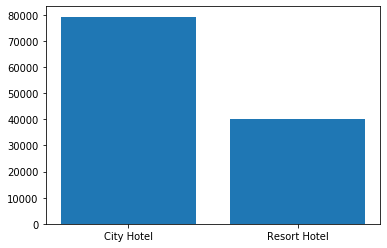

In [13]:
plt.bar(plot_canceled['hotel'], plot_canceled['is_canceled'])
plt.show()

In [20]:
df_cancel = df.groupby(['hotel', 'is_canceled']).lead_time.count().reset_index()

df_cancel

,hotel,is_canceled,lead_time
0,City Hotel,0,46228
1,City Hotel,1,33102
2,Resort Hotel,0,28938
3,Resort Hotel,1,11122


In [18]:
pd.crosstab(columns=df['is_canceled'], index=df['hotel'])

is_canceled,0,1
hotel,,
City Hotel,46228,33102
Resort Hotel,28938,11122


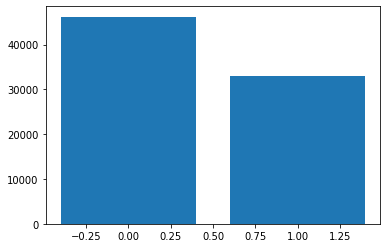

In [21]:
plt.bar(df_cancel['is_canceled'], df_cancel['lead_time'])
plt.show()

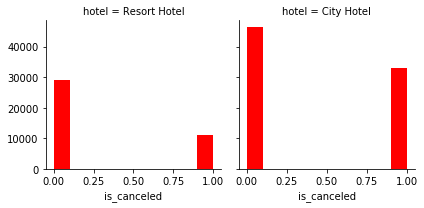

In [33]:
g = sns.FacetGrid(df, col="hotel")
g = g.map(plt.hist, "is_canceled",color="r")

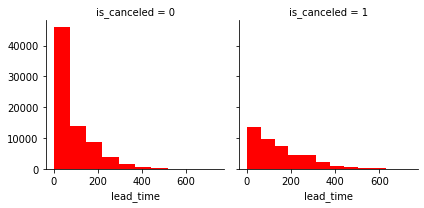

In [34]:
g = sns.FacetGrid(df, col="is_canceled")
g = g.map(plt.hist, "lead_time",color="r")

In [35]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [41]:
group_month = df.groupby('arrival_date_month').hotel.count().reset_index()

group_month

,arrival_date_month,hotel
0,April,11089
1,August,13877
2,December,6780
3,February,8068
4,January,5929
5,July,12661
6,June,10939
7,March,9794
8,May,11791
9,November,6794


In [63]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [77]:
sns_month = sns.barplot(x='hotel', y='arrival_date_month', data=group_month)
for index, row in group_month.iterrows():
    sns_month.text(row.hotel, row.arrival_date_month, round(row.hotel,2), color='black', ha='center')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000022C33CF3048> (for post_execute):


ConversionError: Failed to convert value(s) to axis units: 'April'

ConversionError: Failed to convert value(s) to axis units: 'April'

<Figure size 640x480 with 1 Axes>

In [75]:
show_values_on_bars(sns_month, "h", 0.3)


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import seaborn as sns

# df = pd.DataFrame(np.array([['a'], ['a'], ['b']]), columns=['current_status'])
# ax = sns.countplot(y="current_status", data=df)
# plt.title('Distribution of  Configurations')
# plt.xlabel('Number of Axles')

# total = len(df['current_status'])
# for p in ax.patches:
#         percentage = '{:.1f}%'.format(100 * p.get_width()/total)
#         x = p.get_x() + p.get_width() + 0.02
#         y = p.get_y() + p.get_height()/2
#         ax.annotate(percentage, (x, y))

# plt.show()

In [85]:
X = df.drop(columns='is_canceled')
y = df['is_canceled']

In [101]:
feature_selections = ['lead_time', 'customer_type', 'hotel', 'deposit_type','adr','total_of_special_requests']
x_feat = X[feature_selections]

In [102]:
x_feat

,lead_time,customer_type,hotel,deposit_type,adr,total_of_special_requests
0,342,Transient,Resort Hotel,No Deposit,0.00,0
1,737,Transient,Resort Hotel,No Deposit,0.00,0
2,7,Transient,Resort Hotel,No Deposit,75.00,0
3,13,Transient,Resort Hotel,No Deposit,75.00,0
4,14,Transient,Resort Hotel,No Deposit,98.00,1
...,...,...,...,...,...,...
119385,23,Transient,City Hotel,No Deposit,96.14,0
119386,102,Transient,City Hotel,No Deposit,225.43,2
119387,34,Transient,City Hotel,No Deposit,157.71,4
119388,109,Transient,City Hotel,No Deposit,104.40,0


In [104]:
x_feat.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [108]:
x_feat['customer_type'] = x_feat.customer_type.astype('category')

x_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 6 columns):
lead_time                    119390 non-null int64
customer_type                119390 non-null category
hotel                        119390 non-null object
deposit_type                 119390 non-null object
adr                          119390 non-null float64
total_of_special_requests    119390 non-null int64
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 4.7+ MB


C:\Users\Faris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
x_feat['hotel'] = x_feat.hotel.astype('category')
x_feat['deposit_type'] = x_feat.deposit_type.astype('category')

x_feat

C:\Users\Faris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Faris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lead_time,customer_type,hotel,deposit_type,adr,total_of_special_requests
0,342,Transient,Resort Hotel,No Deposit,0.00,0
1,737,Transient,Resort Hotel,No Deposit,0.00,0
2,7,Transient,Resort Hotel,No Deposit,75.00,0
3,13,Transient,Resort Hotel,No Deposit,75.00,0
4,14,Transient,Resort Hotel,No Deposit,98.00,1
...,...,...,...,...,...,...
119385,23,Transient,City Hotel,No Deposit,96.14,0
119386,102,Transient,City Hotel,No Deposit,225.43,2
119387,34,Transient,City Hotel,No Deposit,157.71,4
119388,109,Transient,City Hotel,No Deposit,104.40,0


In [115]:
x_feat_onehot = pd.get_dummies(x_feat)

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x_feat_onehot, y, random_state=4)

In [119]:
x_train

,lead_time,adr,total_of_special_requests,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,hotel_City Hotel,hotel_Resort Hotel,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
84349,3,84.00,0,0,0,1,0,1,0,1,0,0
116838,36,200.00,2,0,0,1,0,1,0,1,0,0
28611,45,154.00,1,0,0,1,0,0,1,1,0,0
114959,0,120.00,0,0,0,0,1,1,0,1,0,0
28799,18,63.50,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11863,1,105.00,0,0,0,1,0,0,1,1,0,0
115397,405,114.40,0,0,0,0,1,1,0,1,0,0
92599,93,78.85,0,0,0,1,0,1,0,1,0,0
73902,258,62.00,0,1,0,0,0,1,0,1,0,0


In [90]:
glm = LogisticRegression()

In [120]:
glm.fit(x_train, y_train)

C:\Users\Faris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
y_pred = glm.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

76.24631466094881

In [127]:
p_pred = glm.predict_proba(x_test)

In [130]:
score_ = glm.score(x_test,y_test)
score_

0.7624631466094881

In [132]:
conf_m = confusion_matrix(y_test, y_pred)
conf_m

array([[18005,   697],
       [ 6393,  4753]], dtype=int64)

In [134]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.96      0.84     18702
           1       0.87      0.43      0.57     11146

    accuracy                           0.76     29848
   macro avg       0.81      0.69      0.70     29848
weighted avg       0.79      0.76      0.74     29848



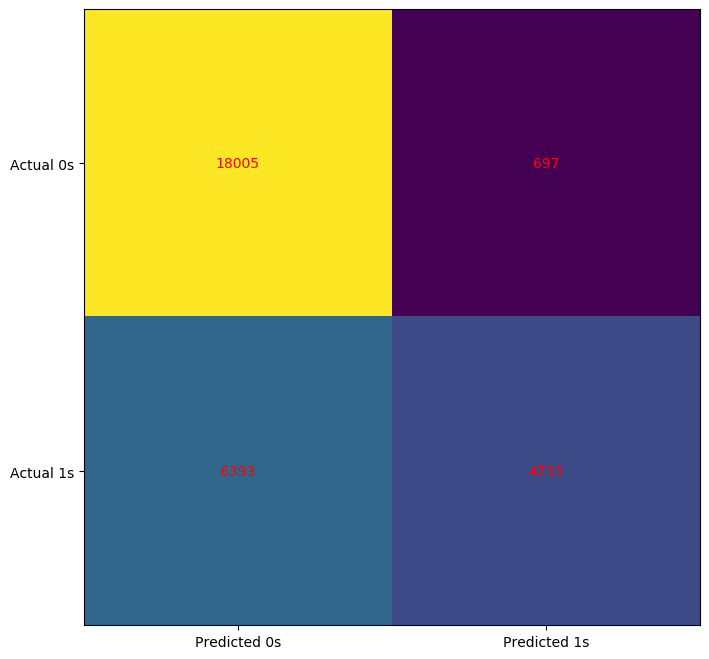

In [135]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_m)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_m[i, j], ha='center', va='center', color='red')
plt.show()